In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset 

In [2]:
data = pd.read_csv('Stores.csv')
df = data.copy()



In [3]:
# Rename Columns for Consistency and Readability 
columns_names = ("Store_ID", "Store_Area", "Items_Available", "Daily_Customer_Count", "Store_Sales")
df.columns = columns_names
print("\nColumns renamed successfully!")


Columns renamed successfully!


##  Initial Data Loading and Inspection

This section focuses on loading the dataset, inspecting its basic structure, and ensuring data quality before proceeding with the analysis.

In [4]:
# lets Display the first few rows and basic info to verify loading and renaming ---
print("\nFirst 5 rows of the DataFrame:")
print(df.head())


First 5 rows of the DataFrame:
   Store_ID  Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0         1        1659             1961                   530        66490
1         2        1461             1752                   210        39820
2         3        1340             1609                   720        54010
3         4        1451             1748                   620        53730
4         5        1770             2111                   450        46620


In [5]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [6]:
print("\nBasic Statistical Description:")
print(df.describe())


Basic Statistical Description:
         Store_ID   Store_Area  Items_Available  Daily_Customer_Count  \
count  896.000000   896.000000       896.000000            896.000000   
mean   448.500000  1485.409598      1782.035714            786.350446   
std    258.797218   250.237011       299.872053            265.389281   
min      1.000000   775.000000       932.000000             10.000000   
25%    224.750000  1316.750000      1575.500000            600.000000   
50%    448.500000  1477.000000      1773.500000            780.000000   
75%    672.250000  1653.500000      1982.750000            970.000000   
max    896.000000  2229.000000      2667.000000           1560.000000   

         Store_Sales  
count     896.000000  
mean    59351.305804  
std     17190.741895  
min     14920.000000  
25%     46530.000000  
50%     58605.000000  
75%     71872.500000  
max    116320.000000  




###  Dataset Overview

In summary, the initial inspection confirms that our dataset is clean in terms of missing values and ready for deeper exploratory data analysis. The `describe()` output provides initial statistical insights, notably highlighting the unusually low `Daily_Customer_Count` for one store that might require special attention.

# Explore Correlations Between Numerical Variables 


In [7]:
print("\nCalculating correlation matrix...")
correlation_matrix = df.corr()
print(correlation_matrix)


Calculating correlation matrix...
                      Store_ID  Store_Area  Items_Available  \
Store_ID              1.000000   -0.058705        -0.055707   
Store_Area           -0.058705    1.000000         0.998891   
Items_Available      -0.055707    0.998891         1.000000   
Daily_Customer_Count -0.010029   -0.041423        -0.040978   
Store_Sales           0.071486    0.097474         0.098849   

                      Daily_Customer_Count  Store_Sales  
Store_ID                         -0.010029     0.071486  
Store_Area                       -0.041423     0.097474  
Items_Available                  -0.040978     0.098849  
Daily_Customer_Count              1.000000     0.008629  
Store_Sales                       0.008629     1.000000  


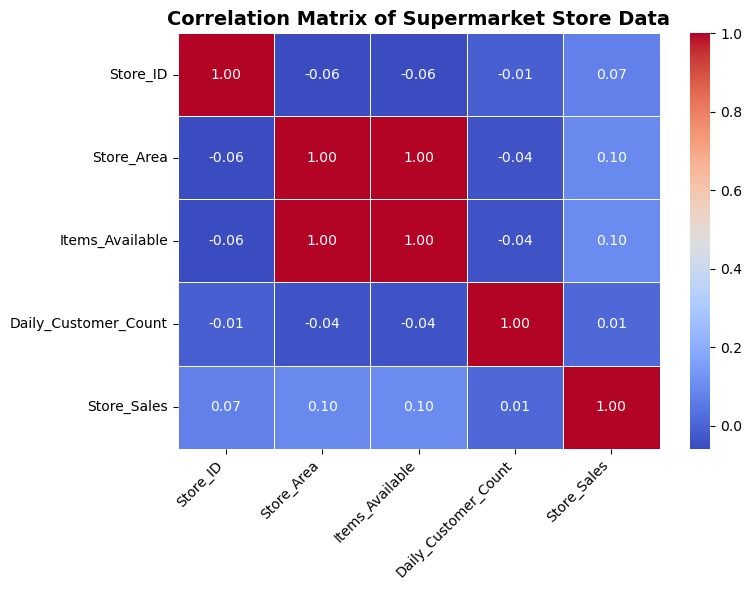

In [8]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Supermarket Store Data', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. Correlation Analysis

To understand the relationships and dependencies between the numerical variables, especially how `Store_Sales` might be influenced by `Store_Area`, `Items_Available`, and `Daily_Customer_Count`, we calculated and visualized the correlation matrix.

### 2.1 Correlation Matrix and Heatmap

The correlation matrix provides a numerical representation of linear relationships (ranging from -1 to 1), while the heatmap offers a quick visual interpretation.


**Key Takeaway from Correlation:**

The most striking finding from this is the **lack of a strong positive linear relationship between `Daily_Customer_Count` and `Store_Sales`**. This challenges common assumptions and suggests that simply attracting more customers might not be the sole or primary driver of increased sales. Other factors, such as the average transaction value per customer, product pricing, or specific item popularity, might play a more significant role. The very high correlation between `Store_Area` and `Items_Available` confirms they are essentially reflections of each other.

 # Visualizing Key Relationships with Scatter Plots 


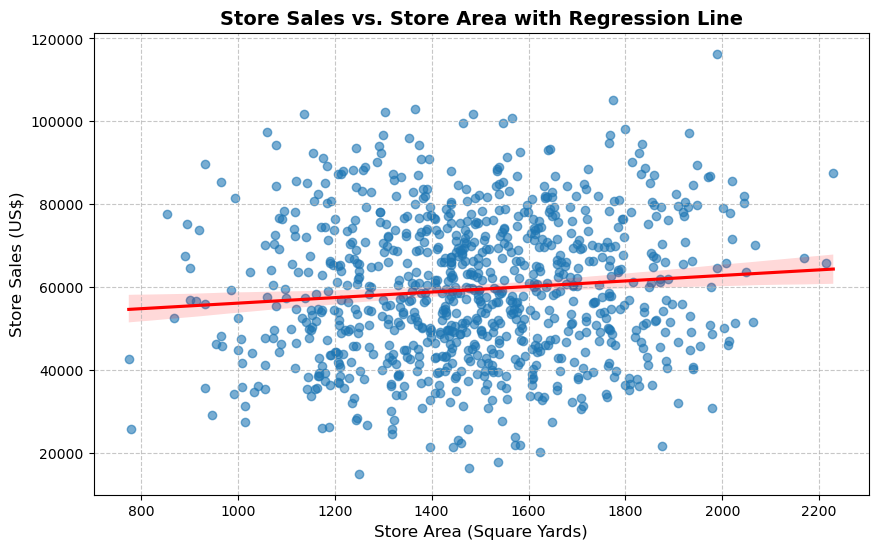

In [9]:
# Scatter plot: Store Sales vs. Store Area
plt.figure(figsize=(10, 6))
sns.regplot(x='Store_Area', y='Store_Sales', data=df, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Store Sales vs. Store Area with Regression Line', fontsize=14, fontweight='bold')
plt.xlabel('Store Area (Square Yards)', fontsize=12)
plt.ylabel('Store Sales (US$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

`Store Sales` vs. `Store Area`

* **Observation:** The scatter plot for `Store_Sales` versus `Store_Area` shows a **very weak, almost flat, positive trend**. The data points are widely scattered, indicating that while there might be a slight tendency for larger stores to have marginally higher sales, store area alone is not a strong predictor of sales performance. This visual confirms the low positive correlation (0.097) observed in the heatmap. It suggests that simply increasing a store's physical area might not directly translate into a significant boost in sales.

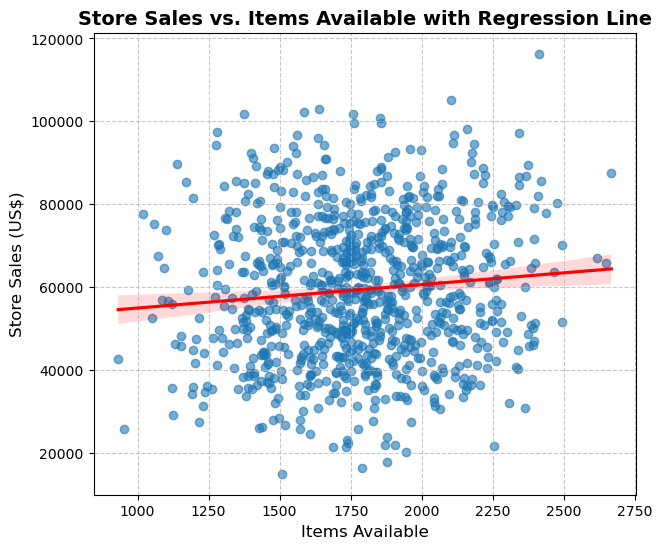

In [10]:
# Scatter plot: Store Sales vs. Items Available
plt.figure(figsize=(7, 6))
sns.regplot(x='Items_Available', y='Store_Sales', data=df, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Store Sales vs. Items Available with Regression Line', fontsize=14, fontweight='bold')
plt.xlabel('Items Available', fontsize=12)
plt.ylabel('Store Sales (US$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

 `Store Sales` vs. `Items Available`

* **Observation:** Similar to store area, the scatter plot for `Store_Sales` versus `Items_Available` also displays a **very weak positive relationship**. The regression line is nearly flat, and the data points are broadly dispersed. This visual reinforces the low correlation (0.099) we found. This implies that stocking more items in a store does not, by itself, guarantee higher sales. Given the high correlation between `Store_Area` and `Items_Available`, it's not surprising that these two plots show similar patterns regarding sales.

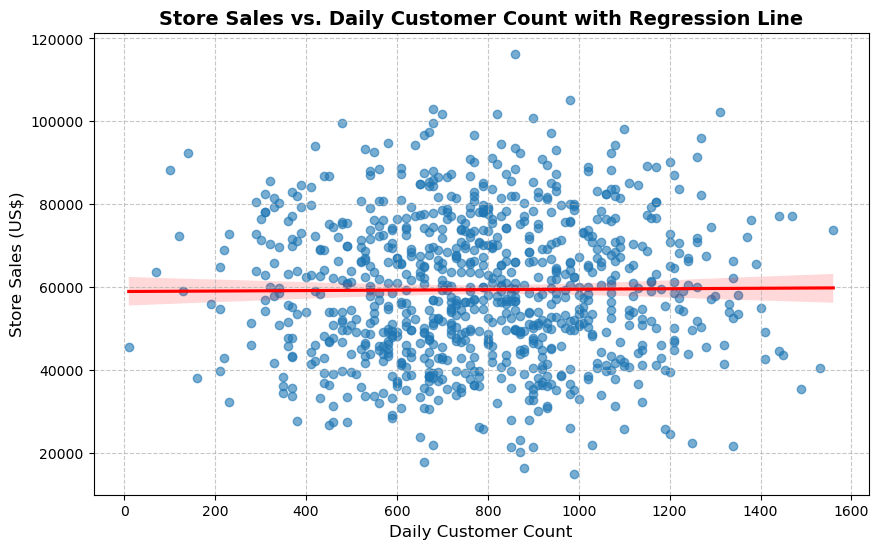

In [11]:
# Scatter plot: Store Sales vs. Daily Customer Count
plt.figure(figsize=(10, 6))
sns.regplot(x='Daily_Customer_Count', y='Store_Sales', data=df, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Store Sales vs. Daily Customer Count with Regression Line', fontsize=14, fontweight='bold')
plt.xlabel('Daily Customer Count', fontsize=12)
plt.ylabel('Store Sales (US$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

`Store Sales` vs. `Daily Customer Count`

* **Observation:** The scatter plot of `Store_Sales` versus `Daily_Customer_Count` is particularly striking. It shows **virtually no discernible linear trend**, with the data points forming a wide, amorphous cloud and the regression line being almost perfectly horizontal. This visual strongy confirms the near-zero correlation (0.009) identified earlier. This is a significant finding: despite common intuition, our dataset suggests that a higher number of daily customers does **not** linearly predict higher store sales. This could imply several things:



  **Varying Average Transaction Value:** Stores with fewer customers might have customers who spend more per visit, while stores with many customers might have lower average transaction values.
     **Customer Behavior:** The quality of customer traffic (e.g., Browse vs. purchasing) might be more important than just the quantity.
     **Other Driving Factors:** There might be other, uncaptured factors influencing sales that are more impactful than just customer count.

**Overall Visual Insights:**

The scatter plots visually confirm the weak correlations. Neither `Store_Area`, `Items_Available`, nor `Daily_Customer_Count` appear to be strong individual linear drivers of `Store_Sales` based on this dataset. This suggests that achieving higher sales might depend on a more complex interplay of factors, or on aspects not directly measured by these three variables. The most surprising insight is the disconnect between daily customer traffic and sales revenue.

# Analyzing Distributions of Key Numerical Variables 


C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\onori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

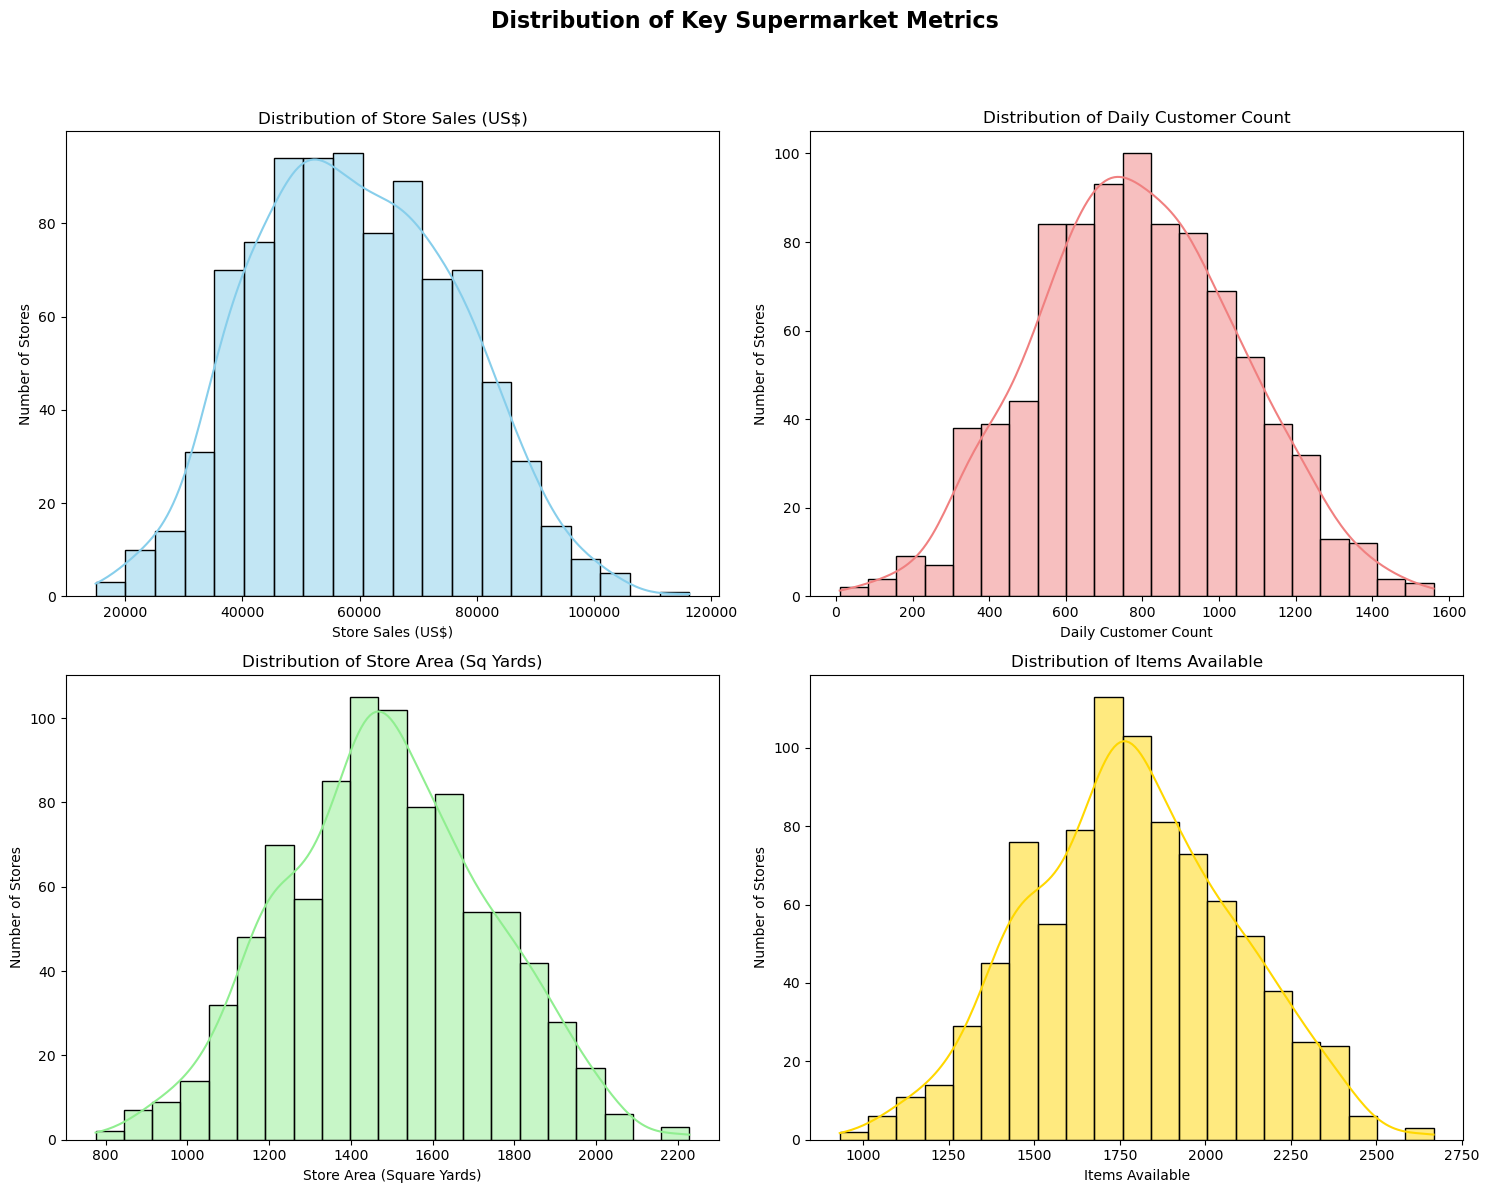

In [12]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Supermarket Metrics', fontsize=16, fontweight='bold', y=1.02) # Overall title for the figure

# Histogram for Store Sales
ax0 = sns.histplot(df['Store_Sales'], kde=True, ax=axes[0, 0], color='skyblue')
ax0.set_title('Distribution of Store Sales (US$)', fontsize=12)
ax0.set_xlabel('Store Sales (US$)', fontsize=10)
ax0.set_ylabel('Number of Stores', fontsize=10)

# Histogram for Daily Customer Count
ax1 = sns.histplot(df['Daily_Customer_Count'], kde=True, ax=axes[0, 1], color='lightcoral')
ax1.set_title('Distribution of Daily Customer Count', fontsize=12)
ax1.set_xlabel('Daily Customer Count', fontsize=10)
ax1.set_ylabel('Number of Stores', fontsize=10)

# Histogram for Store Area
ax2 = sns.histplot(df['Store_Area'], kde=True, ax=axes[1, 0], color='lightgreen')
ax2.set_title('Distribution of Store Area (Sq Yards)', fontsize=12)
ax2.set_xlabel('Store Area (Square Yards)', fontsize=10)
ax2.set_ylabel('Number of Stores', fontsize=10)

# Histogram for Items Available
ax3 = sns.histplot(df['Items_Available'], kde=True, ax=axes[1, 1], color='gold')
ax3.set_title('Distribution of Items Available', fontsize=12)
ax3.set_xlabel('Items Available', fontsize=10)
ax3.set_ylabel('Number of Stores', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

## Distribution Analysis of Key Metrics (Histograms)

To gain a deeper understanding of the spread and frequency of values for our main numerical variables, we've generated histograms for `Store_Sales`, `Daily_Customer_Count`, `Store_Area`, and `Items_Available`. These visualizations help us identify typical ranges, central tendencies, and any unusual data points (outliers).

###  Distribution of Store Sales (US$)

* **Observation:** The distribution of `Store_Sales` appears to be roughly **symmetrical and bell-shaped**, resembling a normal distribution.
* **Insights:** Most stores fall within the sales range of approximately \$$40,000 to \$80,000, with the peak frequency around the average of ~\$$59,351. There are fewer stores with very low or very high sales, indicating a generally consistent performance pattern across the majority of the branches, but also highlighting the existence of both underperforming and high-performing outliers.

###  Distribution of Daily Customer Count

* **Observation:** The `Daily_Customer_Count` distribution also appears **roughly symmetrical**, with a slight concentration towards the center.
* **Insights:** The bulk of stores experience daily customer counts between approximately **500 and 1000**. Crucially, this histogram clearly visualizes the **outlier at the very low end** (around 10-20 customers), which we previously noted from the `df.describe()` output. This confirms that one or a very few stores have significantly lower customer traffic than the vast majority.

###  Distribution of Store Area (Sq Yards)

* **Observation:** The `Store_Area` distribution is relatively **uniform or slightly multimodal**, without a strong single peak.
* **Insights:** Stores are distributed fairly evenly across various sizes, ranging from approximately **800 to 2200 square yards**. This indicates a diverse portfolio of store sizes within the supermarket chain.

###  Distribution of Items Available

* **Observation:** The `Items_Available` distribution shows a strong resemblance to the `Store_Area` distribution, often appearing as **multiple smaller peaks or a broad spread**.
* **Insights:** The number of items available generally spans from **1000 to 2500**. This pattern further reinforces the extremely high correlation observed between `Store_Area` and `Items_Available` – the variety in items available directly mirrors the variety in store sizes.

**Overall Distribution Insights:**

The distributions confirm that while `Store_Area` and `Items_Available` are diverse, `Store_Sales` and `Daily_Customer_Count` are more centrally distributed, with the notable outlier in `Daily_Customer_Count` standing out. The relatively normal-like distributions for sales and customer count suggest that the majority of stores operate within predictable performance ranges, making the outliers (both high and low) particularly interesting for further investigation.

 # Identifing Top and Bottom Performing Stores 


In [13]:
# Top 10 stores by Store Sales
top_10_sales = df.nlargest(10, 'Store_Sales')

top_10_sales

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820
557,558,1137,1374,700,101780
866,867,1565,1854,900,100900
166,167,1465,1763,680,99570
692,693,1548,1858,480,99480
871,872,1800,2158,1100,98260


* **Observations:**
    * The top-performing stores in terms of sales achieve figures well over \$$98,000, with Store 650 leading at \$116,320.
    * Interestingly, there isn't a direct and strong pattern between high sales and very high `Daily_Customer_Count`. For example, Store 693 has \$99,480 in sales with only 480 daily customers, while Store 409 has similar sales with 1310 customers. This reinforces our earlier correlation finding that customer count alone is not the sole determinant of sales.
    * The `Store_Area` and `Items_Available` for these top sales stores vary, but they are generally within the typical range observed in the dataset, without necessarily being the absolute largest stores.


In [14]:
# Bottom 10 stores by Store Sales
bottom_10_sales = df.nsmallest(10, 'Store_Sales')
bottom_10_sales

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
31,32,1250,1508,990,14920
852,853,1477,1790,880,16370
775,776,1537,1877,660,17670
593,594,1624,1946,870,20270
352,353,1397,1686,850,21300
725,726,1445,1734,900,21470
372,373,1876,2254,1340,21650
277,278,1572,1869,1030,21750
252,253,1583,1907,680,21830
670,671,1461,1739,1250,22310


* **Observations:**
    * The lowest-performing stores have sales figures below \$$23,000, with Store 32 having the lowest at \$14,920.
    * Crucially, many of these low-sales stores still have a **high `Daily_Customer_Count` (e.g., Store 32 with 990 customers, Store 373 with 1340 customers)**. This strongly supports the finding that high customer traffic does not automatically translate to high sales. It indicates that these stores might be struggling with conversion rates, average transaction values, or other operational issues despite attracting visitors.
    * Store areas and item availability in these bottom-performing stores are generally within the average range, suggesting these factors are not the primary cause of low sales.

In [15]:
# Top 10 stores by Daily Customer Count
top_10_customers = df.nlargest(10, 'Daily_Customer_Count')
top_10_customers

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
848,849,919,1099,1560,73810
349,350,1886,2228,1530,40350
535,536,1057,1262,1490,35420
94,95,1921,2305,1470,77120
312,313,1494,1806,1450,43640
16,17,1578,1907,1440,77250
334,335,1624,1973,1440,44660
83,84,1572,1884,1410,42670
231,232,1397,1661,1410,49160
648,649,1514,1794,1400,54820


* **Observations:**
    * These stores consistently attract a very high number of daily customers, ranging from 1400 to 1560.
    * However, their `Store_Sales` figures are quite varied and **often not among the overall top sales performers**. For example, Store 849, with the highest customer count (1560), has sales of \$$73,810, which is good but significantly lower than the absolute top sales store (\$116,320). Many of these high-traffic stores have sales in the \$$35,000 - \$55,000 range, which is average or even below average for sales.
    * This further emphasizes the need to analyze factors beyond just customer footfall for sales performance.

In [16]:
# Bottom 10 stores by Daily Customer Count (including the outlier)
bottom_10_customers = df.nsmallest(10, 'Daily_Customer_Count')
bottom_10_customers

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
39,40,1270,1516,10,45480
151,152,1662,1986,70,63730
876,877,1259,1493,100,88270
230,231,1347,1628,120,72350
146,147,1442,1750,130,58920
887,888,1156,1398,140,92370
826,827,1609,1928,160,37920
710,711,1502,1815,190,55980
1,2,1461,1752,210,39820
538,539,1622,1968,210,64780


* **Observations:**
    * This list prominently features **Store 40 with a remarkably low 10 daily customers**, confirming its status as a significant outlier.
    * Surprisingly, several stores with very low customer counts (e.g., Store 877 with 100 customers, Store 888 with 140 customers) achieve **relatively high sales (e.g., \$$88,270 and \$92,370 respectively)**, which are well above the dataset's average. This is a crucial insight: low customer traffic does *not* automatically equate to low sales. These stores likely have customers with very high average transaction values.
    * This section further emphasizes the weak correlation between `Daily_Customer_Count` and `Store_Sales`.

**Conclusion from Top/Bottom Store Analysis:**

This detailed look at top and bottom performers reinforces a critical finding: **Daily Customer Count is not a direct or strong predictor of Store Sales in this dataset.** Some stores with high customer traffic have only average sales, while others with very low customer traffic achieve significantly higher sales. This suggests that the average value of each customer's purchase (transaction value) might be a much more important factor than just the sheer number of customers. For the supermarket company, strategies to increase profit should focus not just on increasing footfall, but also on enhancing the spending per customer in low-performing stores, or understanding and replicating the success factors (e.g., product mix, marketing to high-value customers) in high-sales, low-traffic stores.

#  Visualizing Top/Bottom Store Performance for Comparison 

In [17]:
plot_data_top_sales = top_10_sales[['Store_ID', 'Store_Sales', 'Daily_Customer_Count']].head(5)
plot_data_bottom_sales = bottom_10_sales[['Store_ID', 'Store_Sales', 'Daily_Customer_Count']].head(5)
plot_data_top_customers = top_10_customers[['Store_ID', 'Store_Sales', 'Daily_Customer_Count']].head(5)
plot_data_bottom_customers = bottom_10_customers[['Store_ID', 'Store_Sales', 'Daily_Customer_Count']].head(5)


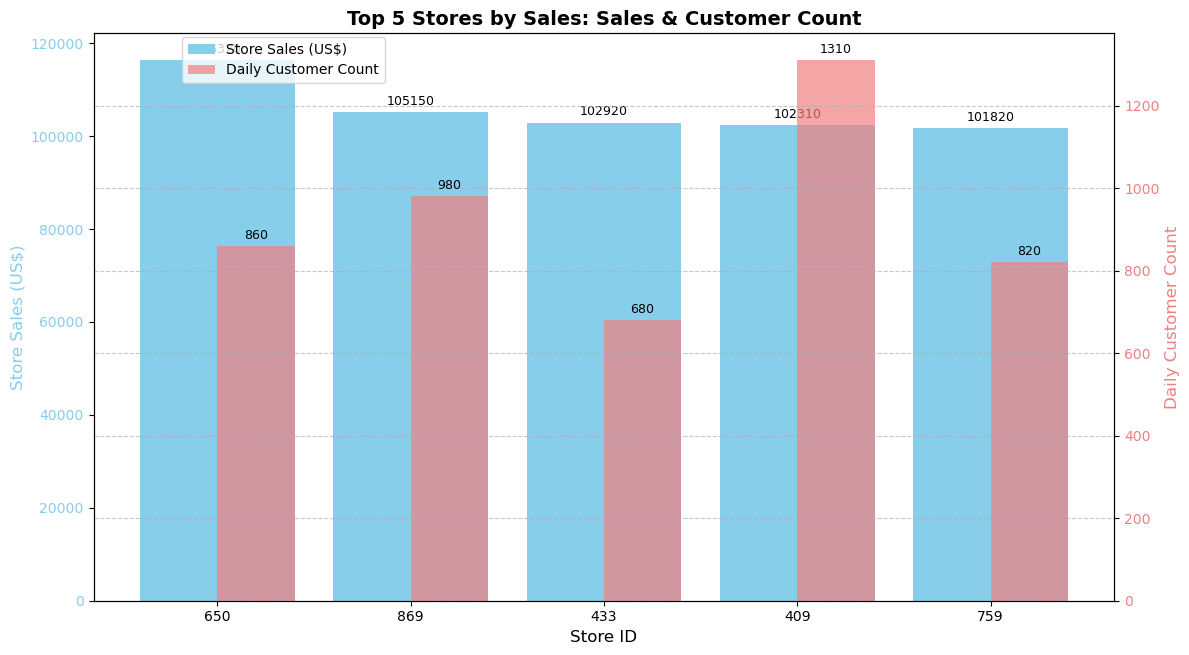

In [18]:
# Plotting Top 5 Sales Stores 
fig, ax = plt.subplots(figsize=(12, 7))

sales_bar = ax.bar(plot_data_top_sales['Store_ID'].astype(str), plot_data_top_sales['Store_Sales'], color='skyblue', label='Store Sales (US$)')
ax.set_ylabel('Store Sales (US$)', color='skyblue', fontsize=12)
ax.tick_params(axis='y', labelcolor='skyblue')

ax.bar_label(sales_bar, fmt='%.0f', fontsize=9, padding=3)

ax2 = ax.twinx()
customer_bar = ax2.bar(plot_data_top_sales['Store_ID'].astype(str), plot_data_top_sales['Daily_Customer_Count'], color='lightcoral', label='Daily Customer Count', alpha=0.7, width=0.4, align='edge')
ax2.set_ylabel('Daily Customer Count', color='lightcoral', fontsize=12)
ax2.tick_params(axis='y', labelcolor='lightcoral')

ax2.bar_label(customer_bar, fmt='%.0f', fontsize=9, padding=3)

ax.set_title('Top 5 Stores by Sales: Sales & Customer Count', fontsize=14, fontweight='bold')
ax.set_xlabel('Store ID', fontsize=12)
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.9))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

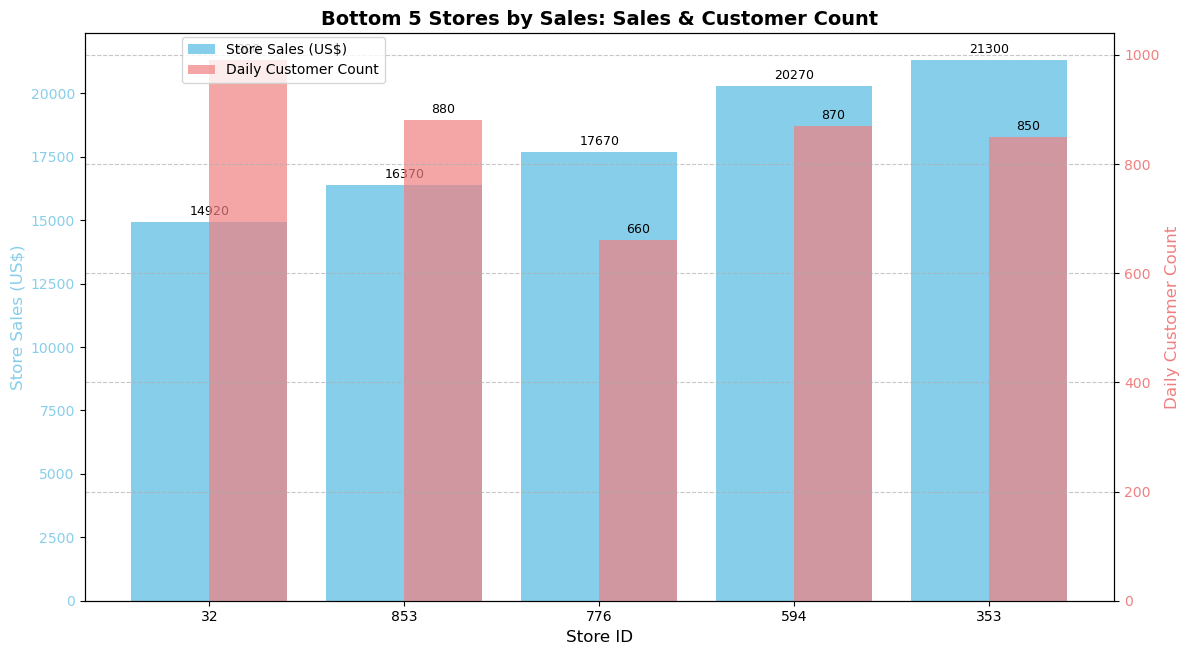

In [19]:
#  Plotting Bottom 5 Sales Stores
fig, ax = plt.subplots(figsize=(12, 7))
sales_bar = ax.bar(plot_data_bottom_sales['Store_ID'].astype(str), plot_data_bottom_sales['Store_Sales'], color='skyblue', label='Store Sales (US$)')
ax.set_ylabel('Store Sales (US$)', color='skyblue', fontsize=12)
ax.tick_params(axis='y', labelcolor='skyblue')
ax.bar_label(sales_bar, fmt='%.0f', fontsize=9, padding=3)

ax2 = ax.twinx()
customer_bar = ax2.bar(plot_data_bottom_sales['Store_ID'].astype(str), plot_data_bottom_sales['Daily_Customer_Count'], color='lightcoral', label='Daily Customer Count', alpha=0.7, width=0.4, align='edge')
ax2.set_ylabel('Daily Customer Count', color='lightcoral', fontsize=12)
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.bar_label(customer_bar, fmt='%.0f', fontsize=9, padding=3)

ax.set_title('Bottom 5 Stores by Sales: Sales & Customer Count', fontsize=14, fontweight='bold')
ax.set_xlabel('Store ID', fontsize=12)
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.9))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

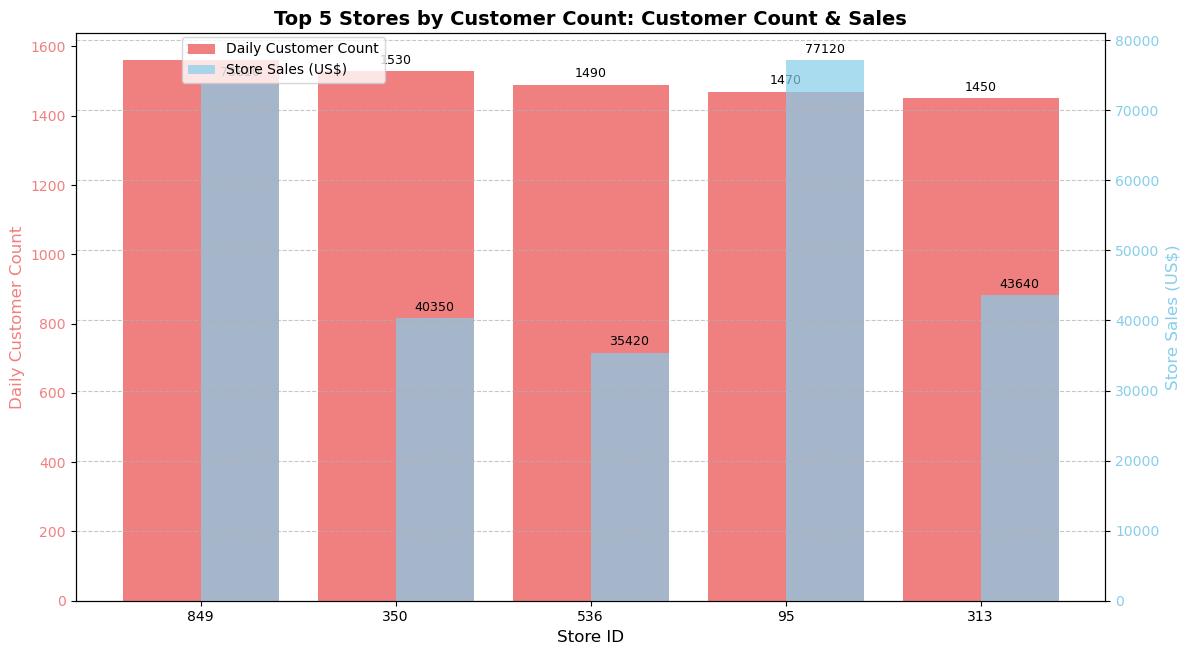

In [20]:
#  Plotting Top 5 Customer Count Stores 
fig, ax = plt.subplots(figsize=(12, 7))
customer_bar = ax.bar(plot_data_top_customers['Store_ID'].astype(str), plot_data_top_customers['Daily_Customer_Count'], color='lightcoral', label='Daily Customer Count')
ax.set_ylabel('Daily Customer Count', color='lightcoral', fontsize=12)
ax.tick_params(axis='y', labelcolor='lightcoral')
ax.bar_label(customer_bar, fmt='%.0f', fontsize=9, padding=3)

ax2 = ax.twinx()
sales_bar = ax2.bar(plot_data_top_customers['Store_ID'].astype(str), plot_data_top_customers['Store_Sales'], color='skyblue', label='Store Sales (US$)', alpha=0.7, width=0.4, align='edge')
ax2.set_ylabel('Store Sales (US$)', color='skyblue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='skyblue')
ax2.bar_label(sales_bar, fmt='%.0f', fontsize=9, padding=3)

ax.set_title('Top 5 Stores by Customer Count: Customer Count & Sales', fontsize=14, fontweight='bold')
ax.set_xlabel('Store ID', fontsize=12)
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.9))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

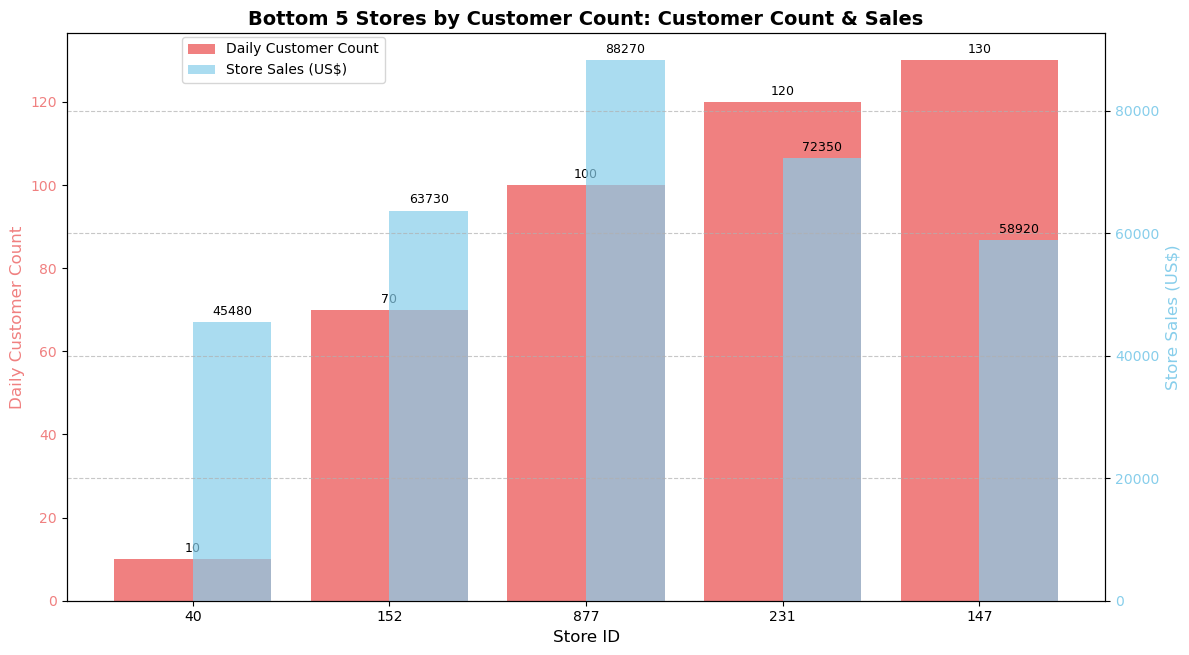

In [21]:
#  Plotting Bottom 5 Customer Count Stores 
fig, ax = plt.subplots(figsize=(12, 7))
customer_bar = ax.bar(plot_data_bottom_customers['Store_ID'].astype(str), plot_data_bottom_customers['Daily_Customer_Count'], color='lightcoral', label='Daily Customer Count')
ax.set_ylabel('Daily Customer Count', color='lightcoral', fontsize=12)
ax.tick_params(axis='y', labelcolor='lightcoral')
ax.bar_label(customer_bar, fmt='%.0f', fontsize=9, padding=3)

ax2 = ax.twinx()
sales_bar = ax2.bar(plot_data_bottom_customers['Store_ID'].astype(str), plot_data_bottom_customers['Store_Sales'], color='skyblue', label='Store Sales (US$)', alpha=0.7, width=0.4, align='edge')
ax2.set_ylabel('Store Sales (US$)', color='skyblue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='skyblue')
ax2.bar_label(sales_bar, fmt='%.0f', fontsize=9, padding=3)

ax.set_title('Bottom 5 Stores by Customer Count: Customer Count & Sales', fontsize=14, fontweight='bold')
ax.set_xlabel('Store ID', fontsize=12)
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.9))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

  #                        Visualizing Performance Extremes

To visually highlight the key insights derived from the top and bottom performing stores, we've created bar charts comparing `Store_Sales` and `Daily_Customer_Count` for these critical segments. This direct comparison helps to solidify our understanding of the factors truly driving sales.

### Top 5 Stores by Sales: Sales & Customer Count

* **Observation:** This chart clearly shows that stores achieving the highest sales figures (e.g., Store 650 with $$116,320 in sales) do so without necessarily having the highest `Daily_Customer_Count`. For instance, Store 693 has sales of nearly $100,000 but a relatively modest 480 daily customers.
* **Insight:** High sales are not exclusively driven by high customer traffic. This suggests that these top-performing stores likely excel in **average transaction value per customer** (i.e., customers spend more per visit) or have a highly efficient sales process, effective product placement, or a premium product mix.

###  Bottom 5 Stores by Sales: Sales & Customer Count

* **Observation:** This plot strikingly reveals that many of the stores with the lowest sales (e.g., Store 32 at $14,920) still manage to attract a **high number of daily customers** (e.g., Store 32 with 990 customers, Store 373 with 1340 customers).
* **Insight:** This is a critical area for improvement. These stores are effectively drawing customers in, but they are failing to convert that footfall into significant revenue. This points to potential issues with **conversion rates, average basket size, pricing strategies, product appeal, or customer experience** that need immediate attention.

###  Top 5 Stores by Customer Count: Customer Count & Sales

* **Observation:** While these stores boast the highest daily customer numbers (e.g., Store 849 with 1560 customers), their sales figures are **highly varied and often not among the absolute top performers**. Some, like Store 849 and Store 95, have decent sales, but others like Store 536 and Store 350 have much lower sales despite drawing nearly as many customers.
* **Insight:** This further reinforces the weak correlation between customer count and sales. Simply attracting more people doesn't guarantee more money. Strategies for these stores should focus on **monetizing their existing high traffic** through upselling, cross-selling, improving product display, or enhancing the shopping experience to encourage higher spending.

###  Bottom 5 Stores by Customer Count: Customer Count & Sales

* **Observation:** This chart prominently features **Store 40 with its extremely low 10 daily customers**. However, it also highlights stores like Store 877 (100 customers, ~$$88,000 sales) and Store 888 (140 customers, ~$92,000 sales), which achieve **surprisingly high sales despite minimal customer traffic**.
* **Insight:** These "low traffic, high sales" stores represent a unique success model. They likely cater to a niche market, attract high-value customers, or specialize in high-margin products. For Store 40, a deep dive is needed to understand if it's a data anomaly, a new store, or a severely struggling branch, as its low customer count doesn't fit the pattern of high sales from other low-traffic stores. The success of other low-traffic stores suggests that a low customer count isn't always a problem if the customers are high-value.

---

**Overall Insights from Performance Extremes:**

These visualizations powerfully demonstrate that the **number of daily customers is not a reliable sole indicator of a store's sales performance or profitability** in this dataset. The crucial factor appears to be the **quality of the customer traffic** and the **average sales value per customer**. Stores with fewer, high-spending customers can outperform stores with many low-spending customers.

This analysis shifts the focus from simply increasing footfall to understanding and optimizing the customer journey and spending habits within the stores.

## 7. Conclusions and Actionable Recommendations

Based on the extensive data analysis of supermarket store branches, we can draw several key conclusions regarding store sales and their dependence on various factors. These insights lead to actionable recommendations aimed at rectifying defects and leveraging positives to ultimately increase overall profits.

### 7.1 Key Findings Summary

* **No Strong Linear Dependence on Customer Count:** Our analysis consistently revealed a very weak to almost non-existent linear correlation between `Daily_Customer_Count` and `Store_Sales`. This was evident in the correlation matrix, scatter plots, and the comparison of top/bottom performing stores. This is a critical finding that challenges the intuitive assumption that more customers automatically mean higher sales.
* **Weak Dependence on Store Area/Items Available:** `Store_Area` and `Items_Available` are highly correlated with each other, but both show only a very weak positive linear relationship with `Store_Sales`. This suggests that simply expanding store size or increasing inventory variety is unlikely to be a primary driver of increased sales on its own.
* **The Importance of Average Transaction Value:** The most striking insight is that stores with lower customer counts can achieve high sales, and stores with high customer counts can have low sales. This strongly implies that the **average transaction value per customer** (how much each customer spends per visit) is a much more significant driver of sales and profit than the sheer volume of customers.
* **Outlier Identification:** Store 40 stands out with an exceptionally low `Daily_Customer_Count` (10 customers), requiring specific investigation. Other stores with low customer counts but high sales (e.g., Store 877, Store 888) represent a successful niche model.

### 7.2 Actionable Recommendations

Based on these findings, here are strategic recommendations for the supermarket company to increase profits and improve store performance:

1.  **Shift Focus from Volume to Value (for low-sales, high-customer stores):**
    * **For stores with High Daily Customer Count but Low Sales (e.g., Store 32, Store 373):**
        * **Implement strategies to increase average transaction value:** This could include staff training on upselling/cross-selling, optimizing product placement for impulse buys, offering bundle deals, or loyalty programs that reward larger purchases.
        * **Analyze customer demographics and purchase patterns:** Understand *why* customers in these stores are spending less per visit. Are they coming for specific low-cost items?
        * **Review store layout and merchandising:** Is the customer journey optimized to encourage exploration and additional purchases?

2.  **Investigate and Replicate High-Sales, Low-Customer Models:**
    * **For stores with High Sales despite Low Daily Customer Count (e.g., Store 877, Store 888):**
        * **Conduct case studies:** Deeply analyze what makes these stores successful. What is their product mix? Are they catering to a specific high-value customer segment? What are their operational efficiencies?
        * **Identify transferable best practices:** Can their strategies (e.g., premium product offerings, highly effective staff, targeted marketing) be replicated in other stores to boost their average transaction value?

3.  **Address Extreme Underperformance (Store 40):**
    * **Detailed Investigation:** A direct, on-site investigation into Store 40 is crucial. Is this data accurate? Is the store new, or is it experiencing severe operational issues (e.g., poor management, unappealing location, intense local competition)?
    * **Strategic Decision:** Depending on the findings, decide on a rectification plan: implement immediate operational improvements, re-evaluate its location/market, or consider closure if viability is extremely low.

4.  **Optimize Store Area and Item Availability (Strategic, Not Primary):**
    * While `Store_Area` and `Items_Available` are not primary drivers of sales, ensure that resources are optimally utilized.
    * **Avoid unnecessary expansion:** Don't automatically assume larger stores or more items will lead to significantly higher sales. Focus on maximizing sales efficiency *within* the existing space and item count.
    * **Ensure adequate inventory:** Maintain sufficient items to meet demand, but avoid overstocking.

5.  **Focus on Marketing for Value, Not Just Volume:**
    * Instead of blanket campaigns to increase footfall, tailor marketing efforts to attract customers who are likely to spend more, or incentivize existing customers to increase their average basket size.

By shifting the focus from merely counting customers to understanding and enhancing the value of each customer interaction, the supermarket company can develop more targeted and effective strategies to increase its overall profitability.